## Overall Goal
### To find out different characterstics of articles which make an article more popular. 
We use number of shares to as a metric for measuring popularity.
## Goal of my analysis -> 
To find out the influence of sentiment and keywords on total number of shares of an article
1. How are kw_avg_avg, kw_min_avg, kw_max_avg related to total number of shares?
2. How are the above 3 spread w.r.t different data_channels
3. How do positive sentiment polarity, negative sentiment polarity and title sentiment polarity affect the total number of shares?
4. How are the above 3 spread w.r.t different data_channels


## Ideation of analysis
### Question 1
We first need to find out if kw_avg_avg, kw_min_avg, kw_max_avg are even related to number of shares.
1. First we scatter-plot the three variables one-by-one with number of shares to bserve and visible relationships. Also plot correlation plot
2.

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats import anova
import statsmodels.api as sm
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [289]:
df = pd.read_csv("./OnlineNewsPopularity 2/OnlineNewsPopularity.csv")

In [290]:
# Function to determine the category
def get_category(row):
    if row[' data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row[' data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row[' data_channel_is_bus'] == 1:
        return 'Business'
    elif row[' data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row[' data_channel_is_tech'] == 1:
        return 'Technology'
    elif row[' data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'Other'


# Apply the function to each row to create the Category column
df['Category'] = df.apply(get_category, axis=1)
#print(df['condensed_datachannel'][1])
#     for row in df.index:
#         df["data_channel_val"][row] = get_category(df['condensed_datachannel'][row])
#print(get_category(df[0]))


In [291]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Category
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Technology
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Social Media
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Other
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,World


In [297]:

sel_df = df[[' kw_avg_min',' num_keywords',' kw_avg_max',' avg_positive_polarity',' avg_negative_polarity', ' title_subjectivity',' title_sentiment_polarity',' kw_avg_avg',' shares']]

#### The above scatterplots do not reveal any direct linear relationship between kw_avg_avg, kw_min_avg and kw_max_avg
#### However, there is a possibility that they still give better results than a null model.
#### Hence, I try to run linear regression (sepaarely first and then together) to see if this is actually the case.

Slope (coefficient): 0.9739138413734753
Intercept: 341.324050573739


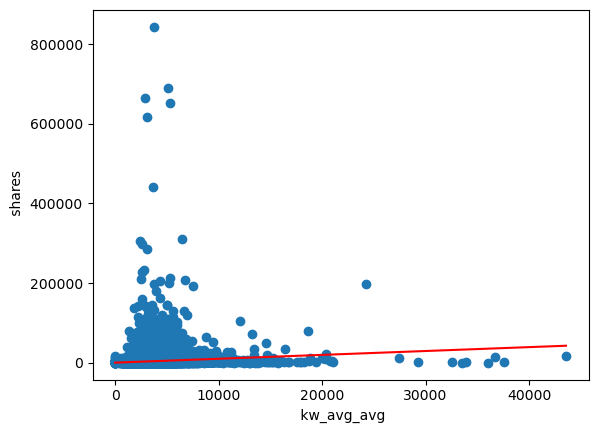

In [280]:
model = LinearRegression()
model.fit(np.asarray(sel_df[' kw_avg_avg']).reshape(-1, 1), sel_df[' shares'])
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

x_line = np.linspace(min(np.asarray(sel_df[' kw_avg_avg'])), max(np.asarray(sel_df[' kw_avg_avg'])), 100)
y_line = model.coef_[0] * x_line + model.intercept_
plt.scatter(sel_df[' kw_avg_avg'],(sel_df[' shares']))
plt.xlabel(' kw_avg_avg')  # Label the x-axis for clarity
plt.ylabel(' shares')
plt.plot(x_line, y_line, color='red')  # Plot the fitted line


Slope (coefficient): 0.12259334465551651
Intercept: 2701.843747202808


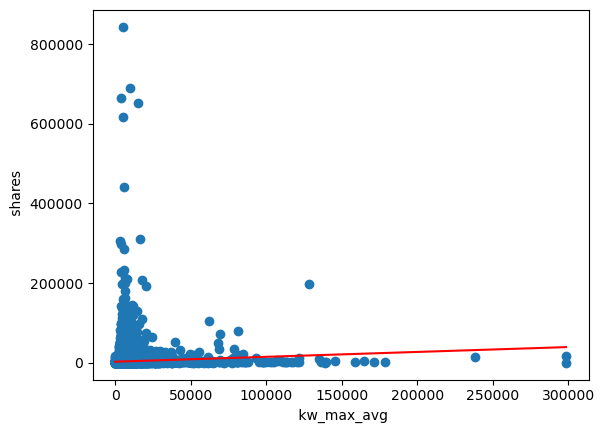

In [281]:
model2 = LinearRegression()
model2.fit(np.asarray(sel_df[' kw_max_avg']).reshape(-1, 1), sel_df[' shares'])

print("Slope (coefficient):", model2.coef_[0])
print("Intercept:", model2.intercept_)

x_line = np.linspace(min(np.asarray(sel_df[' kw_max_avg'])), max(np.asarray(sel_df[' kw_max_avg'])), 100)
y_line = model2.coef_[0] * x_line + model2.intercept_

plt.scatter(sel_df[' kw_max_avg'], sel_df[' shares'])
plt.plot(x_line, y_line, color='red')  # Plot the fitted line
plt.xlabel(' kw_max_avg')  # Label the x-axis for clarity
plt.ylabel(' shares')  # Label the y-axis for clarity
plt.show()  # Display the plot

Slope (coefficient): 0.4042825326068127
Intercept: 2943.7373228626248


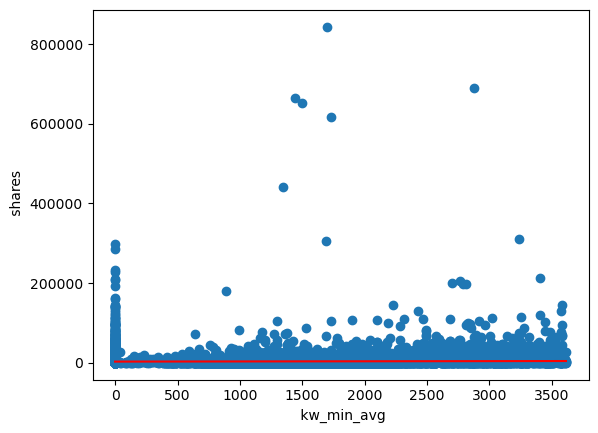

In [282]:
model3 = LinearRegression()
model3.fit(np.asarray(sel_df[' kw_min_avg']).reshape(-1, 1), sel_df[' shares'])

print("Slope (coefficient):", model3.coef_[0])
print("Intercept:", model3.intercept_)

x_line = np.linspace(min(np.asarray(sel_df[' kw_min_avg'])), max(np.asarray(sel_df[' kw_min_avg'])), 100)
y_line = model3.coef_[0] * x_line + model3.intercept_

plt.scatter(sel_df[' kw_min_avg'], sel_df[' shares'])
plt.plot(x_line, y_line, color='red')  # Plot the fitted line
plt.xlabel(' kw_min_avg')  # Label the x-axis for clarity
plt.ylabel(' shares')  # Label the y-axis for clarity
plt.show()  # Display the plot

Though it is interesting to see that there is non-zero coefficients for each term, it is not pratically useful. There are also quite a few outliers which canno be removed(As higher shares means more popular). 

### Hence, I choose to distribute my dependent variable which is number of shares into two groups. Popular and unpopular with >30000 shares being popular.

Here I pivot by slighly modifying my goal to checking if there is difference of kw_avg_avg,kw_min_avg and kw_max_avg with respect to the popular and unpopular groups.

If there is a differnce, I will go on to fit a linear regression model and then find AUC to 

/var/folders/9k/b_vy9rw147729qrz8n_rjjl00000gn/T/ipykernel_32430/463713631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: "High" if x > 30000 else "Low"))


Slope (coefficient): [-2.34425518e-04  1.66133314e-06  4.89677477e-04  7.01682299e-06]
Intercept: [1.05329584e-06]


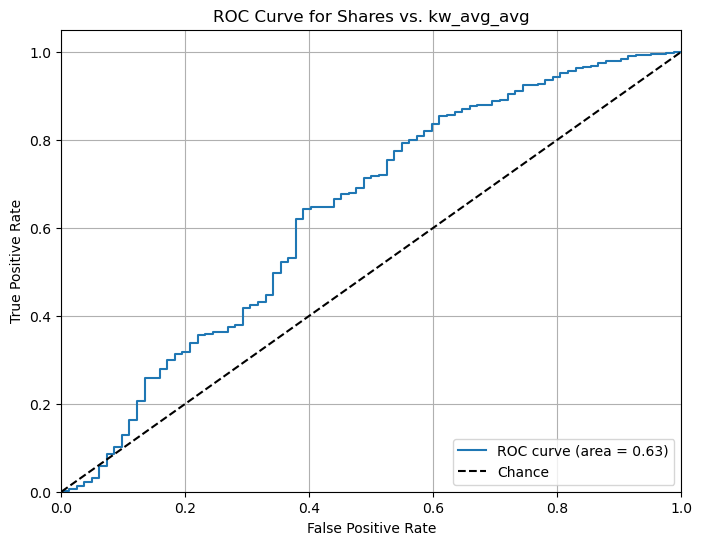

AUC: 0.6341883025049188
<class 'int'>
<class 'int'>
              precision    recall  f1-score   support

           0       0.01      0.87      0.02        82
           1       0.99      0.23      0.37      7847

    accuracy                           0.23      7929
   macro avg       0.50      0.55      0.20      7929
weighted avg       0.98      0.23      0.36      7929

[[  71   11]
 [6072 1775]]


In [299]:
le = LabelEncoder()
sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: "High" if x > 30000 else "Low"))


# Split data into features (X) and target (y)
X = sel_df[[" kw_avg_avg",' kw_avg_max',' kw_avg_min',' num_keywords']]
y = sel_df["share_category"]

#x_line = np.linspace(float(min(X_test)), float(max(y_test)), 100)  # 100 points between min and max X
#y_line = 1 / (1 + np.exp(-model.coef_[0] * x_line - model.intercept_))  # Sigmoid function with fitted parameters

# Create the scatter plot
# plt.scatter(y, X, marker='o', color='blue', label='Data')
# #plt.plot(x_line, y_line, color='red', label='Fitted Logistic Curve')

# # Add labels, title, and legend
# plt.xlabel("y")
# plt.ylabel("X")
# plt.title("Scatter Plot with Fitted Logistic Curve")
# plt.legend()

# # Display the plot
# plt.grid(True)
# plt.show()



#fvalue, pvalue = statsmodels.stats.anova.anova_lm(formula="X ~ y", data=sel_df)

# sns.boxplot(
#     x = "share_category",
#     y = ' kw_avg_avg',
#     showmeans=True,  # Optionally, display the mean values of each category
#     showfliers=False,
#     data=sel_df
# )

# # Customize the plot (optional)
# plt.title("ANOVA Boxplot for Two Categories")
# plt.xlabel("share_category")
# plt.ylabel("kw_avg_avg")
# plt.grid(False)

# # Display the plot
# plt.show()

# lm=ols(formula="X ~ y", data=sel_df).fit()
# table=sm.stats.anova_lm(lm)
# print(table)


# Train-test split (optional, adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
# Create the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train_oversampled, y_train_oversampled)
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]
# Get probability of positive class
y_pred_val = model.predict(X_test)


# # Create a scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test,X_test, marker='o', color='b')

# # Set labels and title
# plt.ylabel("kw_avg_avg")
# plt.xlabel("Log Odds")
# plt.title("Predictor Value vs. Log Odds (Logistic Regression)")

# # Add grid lines for better readability
# plt.grid(True)

# # Show the plot
# plt.show()






# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Shares vs. kw_avg_avg')
plt.legend(loc="lower right")

plt.grid(True)
plt.show()
print("AUC:", roc_auc)
#print("Precision: "+ precision_score(y_test, y_pred))
y_test1 = [int(x) for x in y_test ]
y_pred1 = [int(x) for x in y_pred_val]
print(type(y_test1[0]))
print(type(y_pred1[0]))
#print("recall: "+ metrics.recall_score(y_pred1, y_test1))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_val))
print(confusion_matrix(y_test, y_pred_val))
# for i in range(0,len(y_pred_val)):
#     print(str(y_pred_val[i])+" "+str(list(y_test)[i]))

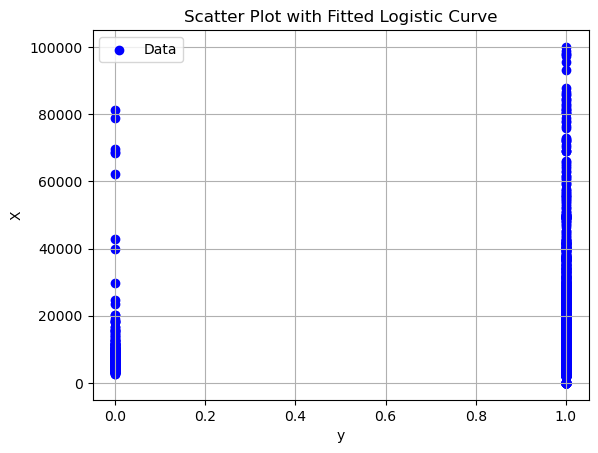

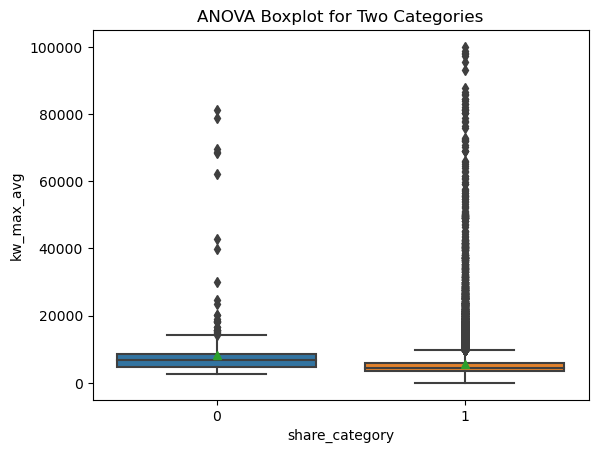

               df        sum_sq       mean_sq           F        PR(>F)
y             1.0  3.014783e+09  3.014783e+09  141.066265  1.766993e-32
Residual  39613.0  8.465851e+11  2.137140e+07         NaN           NaN


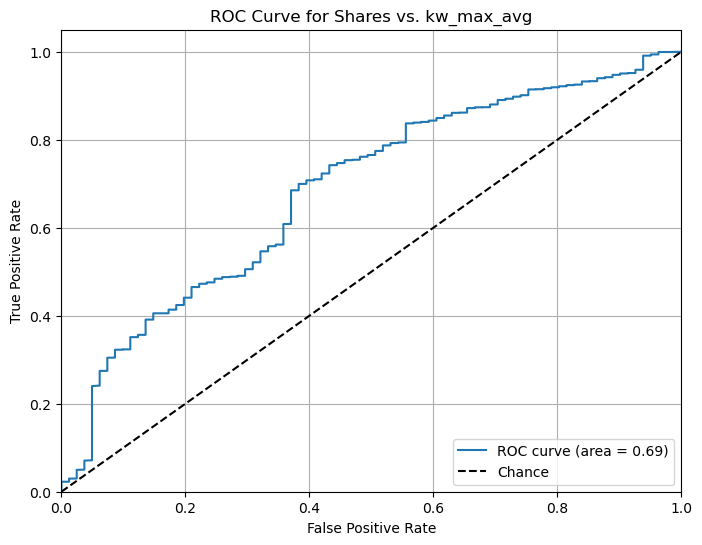

AUC: 0.6856425200172545


In [240]:

sel_df_kw_max = sel_df[sel_df[" kw_max_avg"]<100000]
# Split data into features (X) and target (y)
X = sel_df_kw_max[[" kw_max_avg"]]
y = sel_df_kw_max["share_category"]

#x_line = np.linspace(float(min(X_test)), float(max(y_test)), 100)  # 100 points between min and max X
#y_line = 1 / (1 + np.exp(-model.coef_[0] * x_line - model.intercept_))  # Sigmoid function with fitted parameters

# Create the scatter plot
plt.scatter(y, X, marker='o', color='blue', label='Data')
#plt.plot(x_line, y_line, color='red', label='Fitted Logistic Curve')

# Add labels, title, and legend
plt.xlabel("y")
plt.ylabel("X")
plt.title("Scatter Plot with Fitted Logistic Curve")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()



#fvalue, pvalue = statsmodels.stats.anova.anova_lm(formula="X ~ y", data=sel_df_kw_max)

sns.boxplot(
    x = "share_category",
    y = ' kw_max_avg',
    showmeans=True,  # Optionally, display the mean values of each category
    #showfliers=False,
    data=sel_df_kw_max
)

# Customize the plot (optional)
plt.title("ANOVA Boxplot for Two Categories")
plt.xlabel("share_category")
plt.ylabel("kw_max_avg")
plt.grid(False)

# Display the plot
plt.show()

lm=ols(formula="X ~ y", data=sel_df_kw_max).fit()
table=sm.stats.anova_lm(lm)
print(table)


# Train-test split (optional, adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Shares vs. kw_max_avg')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC:", roc_auc)


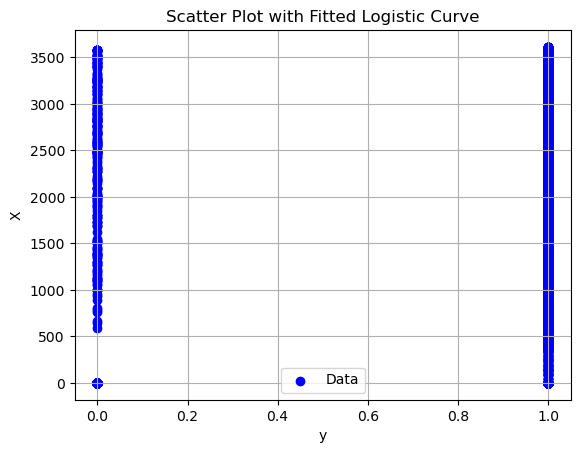

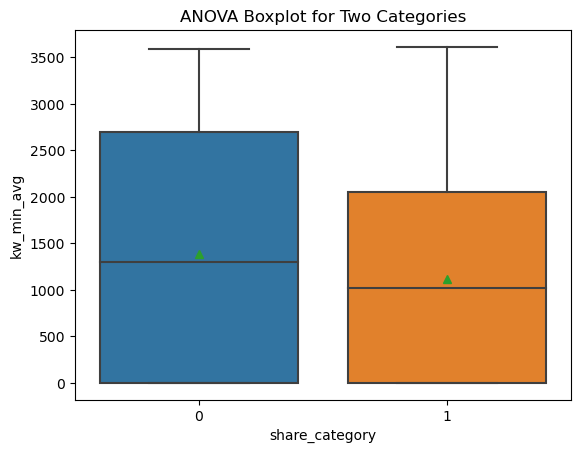

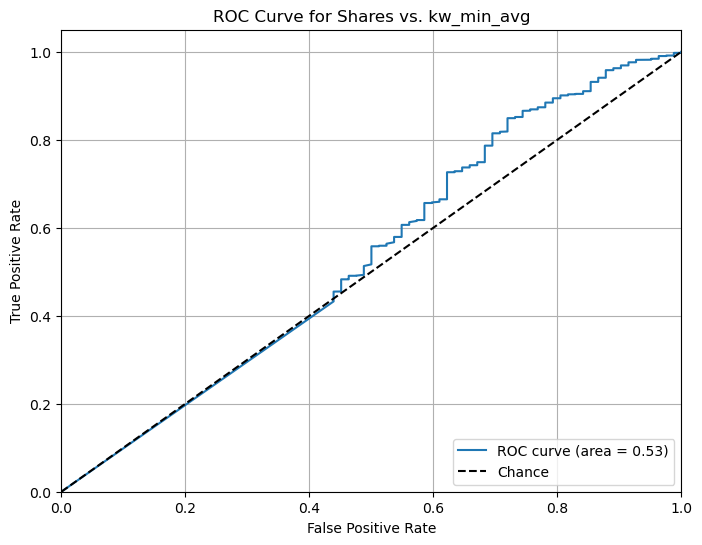

AUC: 0.5337669825659643


In [92]:
sel_df_kw_min = sel_df[sel_df[" kw_min_avg"]<100000]
# Split data into features (X) and target (y)
X = sel_df_kw_min[[" kw_min_avg"]]
y = sel_df_kw_min["share_category"]
# Create the scatter plot
plt.scatter(y, X, marker='o', color='blue', label='Data')
# Add labels, title, and legend
plt.xlabel("y")
plt.ylabel("X")
plt.title("Scatter Plot with Fitted Logistic Curve")
plt.legend()
plt.grid(True)
plt.show()
sns.boxplot(
    x = "share_category",y = ' kw_min_avg', showmeans=True,    #showfliers=False,
    data=sel_df_kw_min)
plt.title("ANOVA Boxplot for Two Categories")
plt.xlabel("share_category")
plt.ylabel("kw_min_avg")
plt.grid(False)
plt.show()

lm=ols(formula="X ~ y", data=sel_df_kw_min).fit()
table=sm.stats.anova_lm(lm)
# Train-test split (optional, adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# Create the logistic regression model
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
# Fit the model
model.fit(X_train_oversampled, y_train_oversampled)
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Shares vs. kw_min_avg')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print("AUC:", roc_auc)


### Even though there is a high F-score and a small p-value, the AUC value is very low. I think this is due to high class imbalance. 
So to fix this, I will use an oversampling technique called SMOTE. Even after using it hoiwever, the AUC is still 0.533. This means that kw_min_avg is not a useful variable for finidng popularity.

From above analysis we found that kw_avg_max and kw_avg_avg are useful variables in 

In [156]:
print(type(np.asarray(y_test.astype(np.int64))))
print(type(y_pred.astype(np.int64))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/var/folders/9k/b_vy9rw147729qrz8n_rjjl00000gn/T/ipykernel_32430/1326039492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: 1 if x > 30000 else 0))


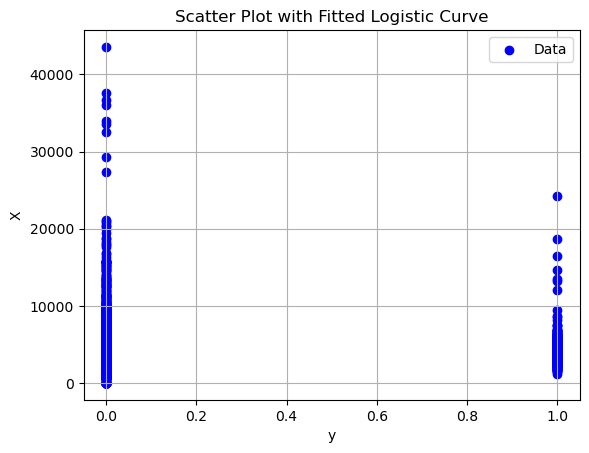

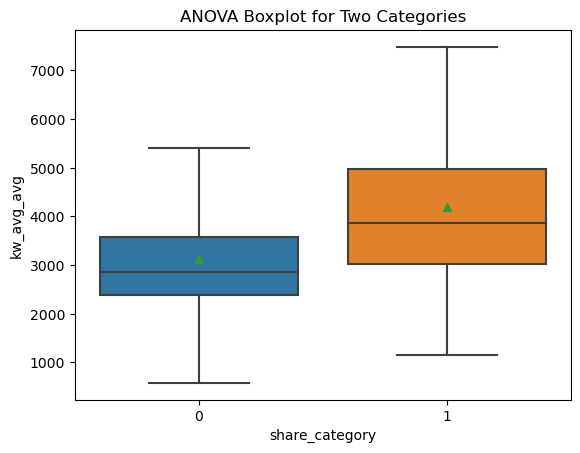

               df        sum_sq       mean_sq           F        PR(>F)
y             1.0  4.918075e+08  4.918075e+08  285.079676  9.812081e-64
Residual  39642.0  6.838872e+10  1.725158e+06         NaN           NaN
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.707


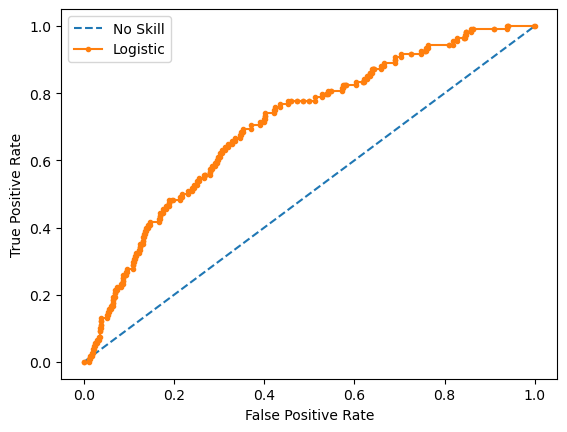

(19606,)
[1 1 1 ... 1 1 1]
AUC: 0.6856425200172545
<class 'int'>
<class 'int'>
              precision    recall  f1-score   support

           0       0.00      1.00      0.00        21
           1       1.00      0.01      0.02      9890

    accuracy                           0.01      9911
   macro avg       0.50      0.51      0.01      9911
weighted avg       1.00      0.01      0.02      9911

[[  21    0]
 [9782  108]]


In [254]:
le = LabelEncoder()
sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: 1 if x > 30000 else 0))


# Split data into features (X) and target (y)
X = sel_df[[" kw_avg_avg"]]
y = sel_df["share_category"]

#x_line = np.linspace(float(min(X_test)), float(max(y_test)), 100)  # 100 points between min and max X
#y_line = 1 / (1 + np.exp(-model.coef_[0] * x_line - model.intercept_))  # Sigmoid function with fitted parameters

# Create the scatter plot
plt.scatter(y, X, marker='o', color='blue', label='Data')
#plt.plot(x_line, y_line, color='red', label='Fitted Logistic Curve')

# Add labels, title, and legend
plt.xlabel("y")
plt.ylabel("X")
plt.title("Scatter Plot with Fitted Logistic Curve")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()



#fvalue, pvalue = statsmodels.stats.anova.anova_lm(formula="X ~ y", data=sel_df)

sns.boxplot(
    x = "share_category",
    y = ' kw_avg_avg',
    showmeans=True,  # Optionally, display the mean values of each category
    showfliers=False,
    data=sel_df
)

# Customize the plot (optional)
plt.title("ANOVA Boxplot for Two Categories")
plt.xlabel("share_category")
plt.ylabel("kw_avg_avg")
plt.grid(False)

# Display the plot
plt.show()

lm=ols(formula="X ~ y", data=sel_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=2)
# generate a no skill prediction (majority class)
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = smote.fit_resample(trainX, trainy)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)
# predict probabilities




lr_probs = model.predict_proba(testX)
lr_probs_val = model.predict(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print(y_test_oversampled.shape)
print(lr_probs_val)
print("AUC:", roc_auc)
#print("Precision: "+ precision_score(y_test, y_pred))
y_test1 = [int(x) for x in y_test ]
y_pred1 = [int(x) for x in y_pred_val]
print(type(y_test1[0]))
print(type(y_pred1[0]))
#print("recall: "+ metrics.recall_score(y_pred1, y_test1))
from sklearn.metrics import classification_report
print(classification_report(lr_probs_val, testy))
print(confusion_matrix(lr_probs_val, testy))
# for i in range(0,len(y_test_oversampled)):
#     print(str(lr_probs_val[i])+" "+str(list(y_test_oversampled)[i]))

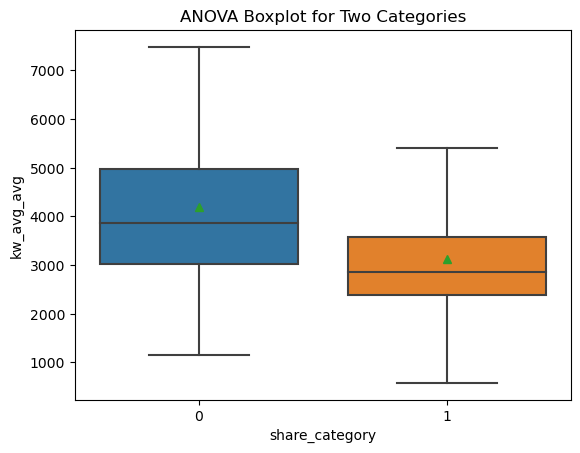

In [265]:
sns.boxplot(
    x = "share_category",
    y = ' kw_avg_avg',
    showmeans=True,  # Optionally, display the mean values of each category
    showfliers=False,
    data=sel_df
)

# Customize the plot (optional)
plt.title("ANOVA Boxplot for Two Categories")
plt.xlabel("share_category")
plt.ylabel("kw_avg_avg")
plt.grid(False)

# Display the plot
plt.show()

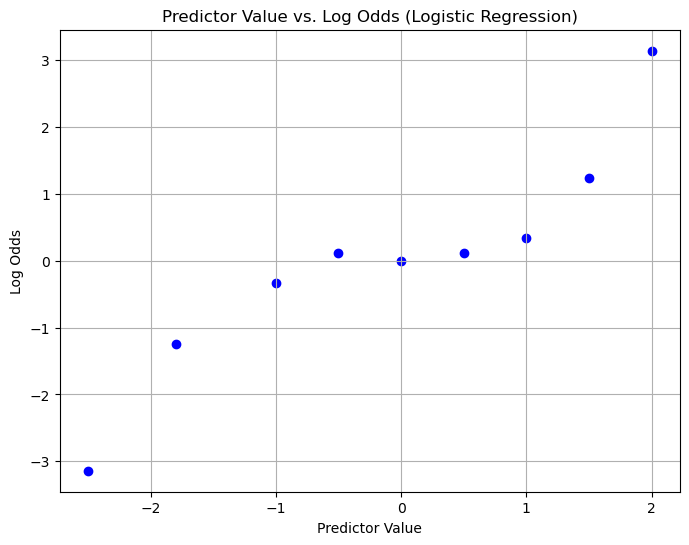

In [286]:
import matplotlib.pyplot as plt

# Sample data for predictor value and log odds (assuming logistic regression)
predictor_values = [-2.5, -1.8, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
log_odds = [-3.14, -1.24, -0.34, 0.12, 0.00, 0.12, 0.34, 1.24, 3.14]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(predictor_values, log_odds, marker='o', color='b')

# Set labels and title
plt.xlabel("Predictor Value")
plt.ylabel("Log Odds")
plt.title("Predictor Value vs. Log Odds (Logistic Regression)")

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [309]:
le = LabelEncoder()
sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: "High" if x > 30000 else "Low"))


# Split data into features (X) and target (y)
X = sel_df[[' num_keywords']]
y = sel_df["share_category"]
# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and fit the logistic regression model
model = LogisticRegression()
#model.fit(X_train, y_train)
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)
print(X)

AUC Score: 0.538543756014423
        num_keywords
0                5.0
1                4.0
2                6.0
3                7.0
4                7.0
...              ...
39639            8.0
39640            7.0
39641            8.0
39642            5.0
39643            4.0

[39644 rows x 1 columns]


/var/folders/9k/b_vy9rw147729qrz8n_rjjl00000gn/T/ipykernel_32430/4070637768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["share_category"] = le.fit_transform(sel_df[" shares"].apply(lambda x: "High" if x > 30000 else "Low"))
